<a href="https://colab.research.google.com/github/bundickm/trump_twitter_archive/blob/master/The_Presidency_280_Characters_at_a_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source: [TrumpTwitterArchive](http://www.trumptwitterarchive.com/archive)

In [0]:
#basic importing and aliasing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

#prevent dataframe truncation by adjusting pandas display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 500)

In [3]:
#uploading a file
from google.colab import files
upload = files.upload()

Saving trump_tweets_dirty_3-29-2019.csv to trump_tweets_dirty_3-29-2019.csv


#Cleaning

In [4]:
tweets = pd.read_csv('trump_tweets_dirty_3-29-2019.csv')
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34477 entries, 0 to 34476
Data columns (total 7 columns):
source            34477 non-null object
text              34476 non-null object
created_at        34473 non-null object
retweet_count     34473 non-null float64
favorite_count    34473 non-null object
is_retweet        34415 non-null object
id_str            34470 non-null float64
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [5]:
source_map = {'Twitter for Android':'Android',
              'Twitter Web Client':'Web Client',
              'Twitter for iPhone':'iPhone',
              'TweetDeck':'Other',
              'TwitLonger Beta':'Other',
              'Media Studio':'Other',
              'Instagram':'Other',
              'Facebook':'Other',
              'Twitter Ads':'Other',
              'Twitter for BlackBerry':'Other',
              'Twitter for iPad':'Other',
              'Mobile Web (M5)':'Other',
              'Twitter Media Studio':'Other',
              'Twitlonger':'Other',
              'Twitter QandA':'Other',
              'Vine - Make a Scene':'Other',
              'Periscope':'Other',
              'Neatly For BlackBerry 10':'Other',
              'Twitter Mirror for iPad':'Other',
              'Twitter for Websites':'Other'}
tweets['source'] = tweets['source'].map(source_map)
tweets['source'].value_counts()

Android       12898
Web Client    11297
iPhone         8716
Other          1562
Name: source, dtype: int64

In [6]:
#Assign nulls in 'is_retweet' to False as all read as though...
#they originate from Trump
retweet_nulls = tweets['is_retweet'].index[tweets['is_retweet'].isnull()]
tweets['is_retweet'].loc[retweet_nulls] = False
tweets.loc[retweet_nulls].head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
4446,iPhone,Thanks to all of the Republican and Democratic lawmakers for today’s very productive meeting on immigration reform. There was strong agreement to negotiate a bill that deals with border security chain migration lottery and DACA. https://t.co/SdqAQ3aL3z https://t.co/8DYHZHspAy,01-09-2018 22:51:50,11718.0,58068,False,9.508627e+17
4447,iPhone,It was my great honor to sign H.R. 267 the “Martin Luther King Jr. National Historical Park Act” which redesignates the Martin Luther King Junior National Historic Site in the State of Georgia as the Martin Luther King Jr. National Historical Park. https://t.co/Qe0b6HBFTY https://t.co/QTgaqTawPT,01-09-2018 20:17:17,17249.0,73554,False,9.508238e+17
4448,iPhone,On behalf of the American people THANK YOU to our incredible law enforcement officers. As President of the United States - I will fight for you and I will never ever let you down. Now more than ever we must support the men and women in blue! #LawEnforcementAppreciationDay https://t.co/Qb4uxB4JRm,01-09-2018 17:11:23,26793.0,112613,False,9.507770e+17
4449,iPhone,We are fighting for our farmers for our country and for our GREAT AMERICAN FLAG. We want our flag respected - and we want our NATIONAL ANTHEM respected also! https://t.co/16eOLXg6Fi,01-08-2018 23:19:47,22044.0,104968,False,9.505074e+17
4450,iPhone,In every decision we make we are honoring America’s PROUD FARMING LEGACY. Years of crushing taxes crippling regs &amp; corrupt politics left our communities hurting our economy stagnant &amp; millions of hardworking Americans COMPLETELY FORGOTTEN. But they are not forgotten ANYMORE! https://t.co/MdYS7xnukQ,01-08-2018 22:59:37,17769.0,81027,False,9.505023e+17


In [7]:
#look at all tweets that may have an incorrect datetime format by 
#pulling anything before 2010(does not contain '201').
tweets['created_at'] = tweets['created_at'].astype(str)
date_time_index = list(np.where(tweets['created_at'].str.contains('201') == False))
date_time_index
for index in date_time_index:
  problem_tweets = tweets.loc[index]
  
problem_tweets.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
33954,Other,My interview which recently aired on CNBC's Squawk Box http://t.co/VNbgG0iU,nan,NaN,NaN,False,NaN
33955,NaN,09-19-2011 17:54:28,18,7.0,false,115846232714391552,NaN
34078,Other,http://goo.gl/AMNEE Countdown to @AmericaNowRadio as my former,nan,NaN,NaN,False,NaN
34079,NaN,08-09-2011 19:33:31,20,3.0,false,101013255950053376,NaN
34102,Other,http://bit.ly/pwgGsQ,nan,NaN,NaN,False,NaN


In [8]:
#drop the rows missing values and convert 'created_at' to datetime
tweets = tweets.dropna(thresh=7)
tweets['created_at'] = pd.to_datetime(tweets['created_at'])
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34470 entries, 0 to 34476
Data columns (total 7 columns):
source            34470 non-null object
text              34470 non-null object
created_at        34470 non-null datetime64[ns]
retweet_count     34470 non-null float64
favorite_count    34470 non-null object
is_retweet        34470 non-null object
id_str            34470 non-null float64
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 2.1+ MB


In [9]:
tweets.isnull().sum()

source            0
text              0
created_at        0
retweet_count     0
favorite_count    0
is_retweet        0
id_str            0
dtype: int64

In [10]:
#look at tweet length, found some issues
tweets['tweet_length'] = tweets['text'].apply(len)
tweets['tweet_length'].describe()

count    34470.000000
mean       134.246098
std        180.341724
min          2.000000
25%         91.000000
50%        126.000000
75%        138.000000
max      20483.000000
Name: tweet_length, dtype: float64

In [11]:
#all extra long tweets are due to how retweets are handled
tweets[(tweets['tweet_length'] > 350) & (tweets['is_retweet'] == False)]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,tweet_length


In [12]:
#tweets greater than 280 characters and not retweets are because of how twitter handles links
tweets[(tweets['tweet_length'] > 280) & (tweets['is_retweet'] == False)]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,tweet_length
4447,iPhone,It was my great honor to sign H.R. 267 the “Martin Luther King Jr. National Historical Park Act” which redesignates the Martin Luther King Junior National Historic Site in the State of Georgia as the Martin Luther King Jr. National Historical Park. https://t.co/Qe0b6HBFTY https://t.co/QTgaqTawPT,2018-01-09 20:17:17,17249.0,73554,False,9.508238e+17,296
4448,iPhone,On behalf of the American people THANK YOU to our incredible law enforcement officers. As President of the United States - I will fight for you and I will never ever let you down. Now more than ever we must support the men and women in blue! #LawEnforcementAppreciationDay https://t.co/Qb4uxB4JRm,2018-01-09 17:11:23,26793.0,112613,False,9.507770e+17,296
4450,iPhone,In every decision we make we are honoring America’s PROUD FARMING LEGACY. Years of crushing taxes crippling regs &amp; corrupt politics left our communities hurting our economy stagnant &amp; millions of hardworking Americans COMPLETELY FORGOTTEN. But they are not forgotten ANYMORE! https://t.co/MdYS7xnukQ,2018-01-08 22:59:37,17769.0,81027,False,9.505023e+17,307
4454,iPhone,...Clinton in the WH doubling down on Barack Obama’s failed policies washes away any doubts that America made the right choice. This was truly a change election — and the changes Trump is bringing are far-reaching &amp; necessary.” Thank you Michael Goodwin! https://t.co/4fHNcx2Ydg,2018-01-08 03:24:23,18904.0,83265,False,9.502065e+17,282
4466,iPhone,Michael Wolff is a total loser who made up stories in order to sell this really boring and untruthful book. He used Sloppy Steve Bannon who cried when he got fired and begged for his job. Now Sloppy Steve has been dumped like a dog by almost everyone. Too bad! https://t.co/mEeUhk5ZV9,2018-01-06 04:32:08,23915.0,88836,False,9.494988e+17,284
4474,iPhone,Thank you to the great Republican Senators who showed up to our mtg on immigration reform. We must BUILD THE WALL stop illegal immigration end chain migration &amp; cancel the visa lottery. The current system is unsafe &amp; unfair to the great people of our country - time for change!,2018-01-04 23:53:05,30271.0,137534,False,9.490662e+17,285
4487,iPhone,North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone from his depleted and food starved regime please inform him that I too have a Nuclear Button but it is a much bigger &amp; more powerful one than his and my Button works!,2018-01-03 00:49:19,191837.0,499183,False,9.483556e+17,282
4490,iPhone,Congratulations to Senator Orrin Hatch on an absolutely incredible career. He has been a tremendous supporter and I will never forget the (beyond kind) statements he has made about me as President. He is my friend and he will be greatly missed in the U.S. Senate! https://t.co/0VjzLEeHTl,2018-01-02 22:23:41,12392.0,63280,False,9.483189e+17,287
4499,iPhone,Crooked Hillary Clinton’s top aid Huma Abedin has been accused of disregarding basic security protocols. She put Classified Passwords into the hands of foreign agents. Remember sailors pictures on submarine? Jail! Deep State Justice Dept must finally act? Also on Comey &amp; others,2018-01-02 12:48:00,37561.0,130933,False,9.481740e+17,282
4502,iPhone,Iran is failing at every level despite the terrible deal made with them by the Obama Administration. The great Iranian people have been repressed for many years. They are hungry for food &amp; for freedom. Along with human rights the wealth of Iran is being looted. TIME FOR CHANGE!,2018-01-01 12:44:40,29046.0,111467,False,9.478108e+17,282


#Exploration

##Preferred Device for Tweeting

In [13]:
tweets.groupby('source').size()

source
Android       12898
Other          1559
Web Client    11297
iPhone         8716
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


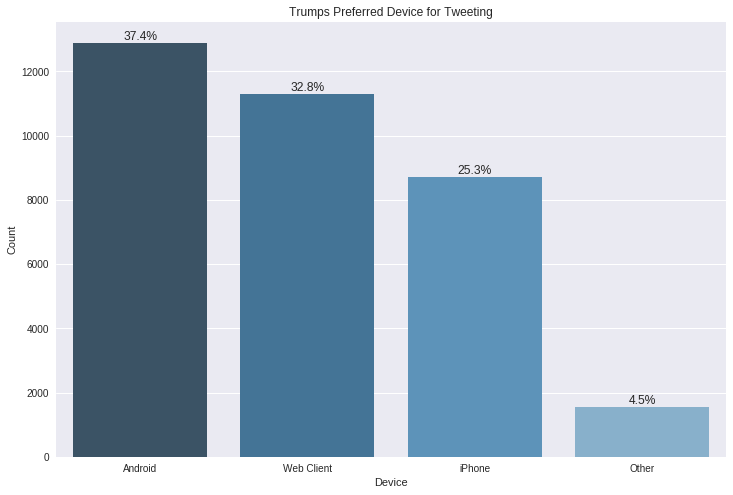

In [58]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(x='source',data=tweets.sort_values('source'), palette='Blues_d', order=['Android','Web Client','iPhone','Other'])
ax.set_title('Trumps Preferred Device for Tweeting')
ax.set_xlabel('Device')
ax.set_ylabel('Count')

#Percent of Tweets per Device centered above each bar
ncount = len(tweets)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

plt.savefig('trumps_preferred_device.png', format='png', dpi=300)
files.download('trumps_preferred_device.png')

In [0]:
pd.Series(tweets['source'].value_counts()).sort_values(ascending=False)

Android       12898
Web Client    11297
iPhone         8716
Other          1559
Name: source, dtype: int64

##Tweets by Hour of the Day

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


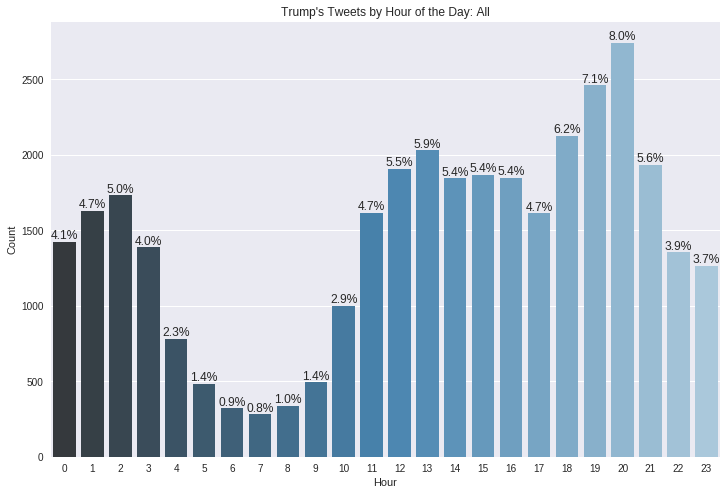

In [59]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(tweets['created_at'].dt.hour, palette='Blues_d')
ax.set_title("Trump's Tweets by Hour of the Day: All")
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

#Percent of Tweets per Hour centered above each bar
ncount = len(tweets)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    
plt.savefig('trumps_tweets_by_hour_all.png', format='png', dpi=300)
files.download('trumps_tweets_by_hour_all.png')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


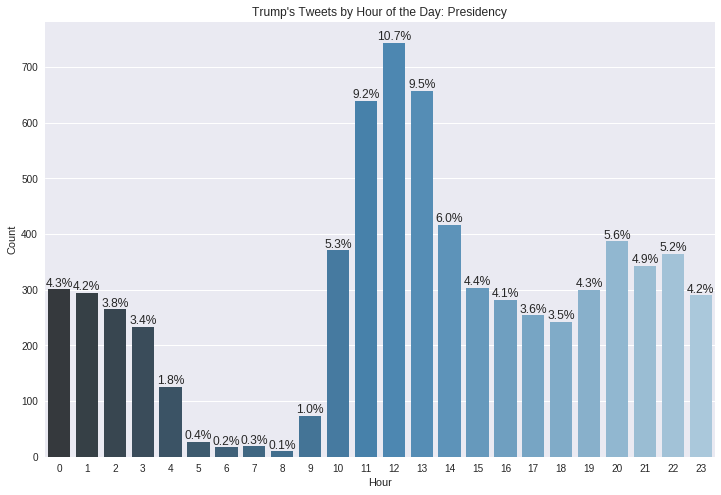

In [61]:
fig = plt.figure(figsize=(12,8))
ax = sns.countplot(tweets[tweets['created_at'] >= '2017-1-20']['created_at'].dt.hour, palette='Blues_d')
ax.set_title("Trump's Tweets by Hour of the Day: Presidency")
ax.set_xlabel('Hour')
ax.set_ylabel('Count')

#Percent of Tweets per Hour centered above each bar
ncount = len(tweets[tweets['created_at'] >= '2017-1-20'])
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    
plt.savefig('trumps_tweets_by_hour_presidency.png', format='png', dpi=300)
files.download('trumps_tweets_by_hour_presidency.png')

##Word Clouds

In [0]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from google.colab import files
from imageio import imread

In [0]:
#function to combine all of the tweets from tweets['text'], 
#but remove urls, trump's handle, and 'RT'
def trump_tweet_cleaner(tweets):
  text = " ".join(tweet for tweet in tweets)
  return " ".join([word for word in text.split()
                  if 'http' not in word
                  and not word.startswith('@real')
                  and word != 'RT'])

In [0]:
#function to create word clouds since I need a few
def word_cloud_creator(text, file_name, stop_word_list='', 
                       mask_image='', colormap='viridis'):
  
  # Create stopword list:
  stopwords = set(STOPWORDS)
  stopwords.update(stop_word_list)

  # Generate a word cloud image
  if mask_image == '':
    wordcloud = WordCloud(stopwords=stopwords, 
                          background_color="black", 
                          colormap=colormap, 
                          width=1800, 
                          height=1400).generate(text)
  else:
    mask = imread(mask_image)
    wordcloud = WordCloud(stopwords=stopwords, 
                          background_color="black", 
                          colormap=colormap, 
                          width=1800, 
                          height=1400, 
                          mask=mask).generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

  plt.savefig(file_name, format='png', dpi=300)
  files.download(file_name)

In [0]:
#variables for word_cloud_creator that shouldn't change between cloud creations
stop_word_list = ['Trump','Donald','Donald Trump','Twitter','Android',
                  'Web Client','https','co','Web','Client','amp','RT','will']
mask_image = 'twitter_mask.png'
colormap = 'bwr'

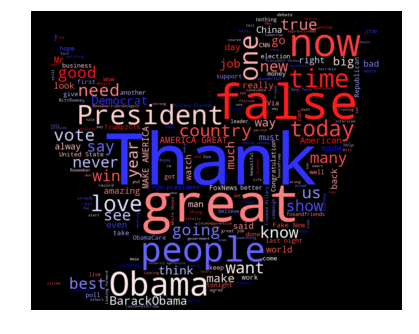

In [0]:
#Word cloud of all of Trump's tweets
file_name = 'all_trump_tweets.png'

text = trump_tweet_cleaner(tweets['text'])
word_cloud_creator(text, file_name, stop_word_list, mask_image, colormap)

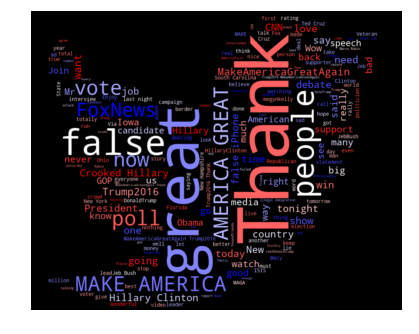

In [0]:
#Word cloud of all of Trump's tweets while on his 2016 campaign
file_name = 'campaign_trump_tweets.png'

text = trump_tweet_cleaner(
       tweets[(tweets['created_at'] >= '2015-06-16') & 
       (tweets['created_at'] <= '2016-11-8')]['text'])
word_cloud_creator(text, file_name, stop_word_list, mask_image, colormap)

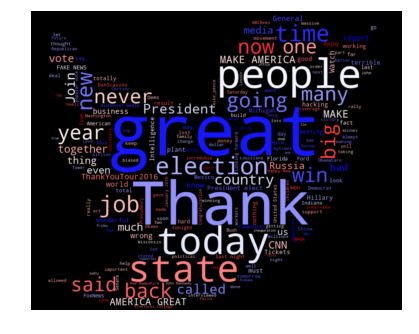

In [0]:
#Word cloud of all of Trump's tweets while president elect
file_name = 'president_elect_trump_tweets.png'

text = trump_tweet_cleaner(
       tweets[(tweets['created_at'] >= '2016-11-8') & 
       (tweets['created_at'] < '2017-1-20')]['text'])
word_cloud_creator(text, file_name, stop_word_list, mask_image, colormap)

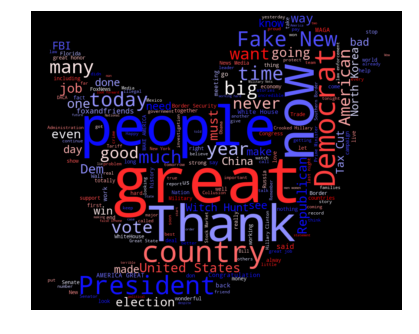

In [0]:
#Word cloud of all of Trump's tweets while president
file_name = 'president_trump_tweets.png'

text = trump_tweet_cleaner(
       tweets[tweets['created_at'] >= '2017-1-20']['text'])
word_cloud_creator(text, file_name, stop_word_list, mask_image, colormap)

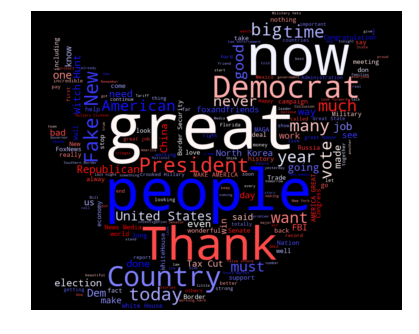

In [0]:
#Word cloud of all of Trump's tweets while president
file_name = 'trump_tweets_last_week.png'

text = trump_tweet_cleaner(
       tweets[tweets['created_at'] >= '2017-3-22']['text'])
word_cloud_creator(text, file_name, stop_word_list, mask_image, colormap)

##Text Stats

In [22]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 6.7MB/s 


In [0]:
import textstat

In [24]:
tweets['tweet_word_count'] = tweets['text'].apply(textstat.lexicon_count)
tweets[tweets['is_retweet']==False]['tweet_word_count'].describe()

count    58.000000
mean     38.189655
std      13.301440
min       4.000000
25%      31.500000
50%      43.000000
75%      48.000000
max      54.000000
Name: tweet_word_count, dtype: float64

In [0]:
tweets['char_per_word'] = tweets['tweet_length'] / tweets['tweet_word_count']

In [26]:
tweets[tweets['is_retweet']==False]['char_per_word'].describe()

count    58.000000
mean      6.159759
std       0.943539
min       4.916667
25%       5.585459
50%       5.893237
75%       6.356785
max      10.200000
Name: char_per_word, dtype: float64

In [0]:
tweets['fk_grade'] = tweets['text'].apply(textstat.flesch_kincaid_grade)

In [28]:
tweets[tweets['is_retweet']==False]['fk_grade'].describe()

count    58.000000
mean      9.075862
std       4.156006
min       3.600000
25%       6.100000
50%       8.500000
75%      10.000000
max      20.800000
Name: fk_grade, dtype: float64

In [29]:
#Character encodings and links impact the FK Grade
tweets[(tweets['is_retweet']==False) & (tweets['fk_grade'] > 12)]

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,tweet_length,tweet_word_count,char_per_word,fk_grade
4446,iPhone,Thanks to all of the Republican and Democratic lawmakers for today’s very productive meeting on immigration reform. There was strong agreement to negotiate a bill that deals with border security chain migration lottery and DACA. https://t.co/SdqAQ3aL3z https://t.co/8DYHZHspAy,2018-01-09 22:51:50,11718.0,58068,False,9.508627e+17,276,37,7.459459,14.0
4450,iPhone,In every decision we make we are honoring America’s PROUD FARMING LEGACY. Years of crushing taxes crippling regs &amp; corrupt politics left our communities hurting our economy stagnant &amp; millions of hardworking Americans COMPLETELY FORGOTTEN. But they are not forgotten ANYMORE! https://t.co/MdYS7xnukQ,2018-01-08 22:59:37,17769.0,81027,False,9.505023e+17,307,42,7.309524,12.3
4451,iPhone,We have been working every day to DELIVER for America’s Farmers just as they work every day to deliver FOR US. #AFBF18 https://t.co/QDH7fvFkZ7,2018-01-08 22:58:13,11561.0,57809,False,9.505019e+17,142,23,6.173913,13.4
4452,iPhone,Can’t wait to be back in the amazing state of Tennessee to address the 99th American @FarmBureau Federation’s Annual Convention in Nashville! #AFBF18On my way now - join me LIVE at 4:00pmE: https://t.co/QaljAqekdD. https://t.co/Wm7Io0hYT8,2018-01-08 19:06:40,10242.0,54355,False,9.504437e+17,238,33,7.212121,17.3
4460,iPhone,Leaving Camp David for the White House. Great meetings with the Cabinet and Military on many very important subjects including Border Security &amp; the desperately needed Wall the ever increasing Drug and Opioid Problem Infrastructure Military Budget Trade and DACA.,2018-01-07 14:33:10,15557.0,81553,False,9.500124e+17,267,40,6.675000,13.5
4463,iPhone,Now that Russian collusion after one year of intense study has proven to be a total hoax on the American public the Democrats and their lapdogs the Fake News Mainstream Media are taking out the old Ronald Reagan playbook and screaming mental stability and intelligence.....,2018-01-06 12:19:10,35083.0,148583,False,9.496163e+17,273,45,6.066667,19.7
4473,iPhone,MAKING AMERICA GREAT AGAIN! https://t.co/iONbr1DkVk,2018-01-05 00:11:26,22283.0,93496,False,9.490708e+17,51,5,10.200000,14.7
4482,iPhone,“Some 40 U.S. companies have responded to President Trump’s tax cut and reform victory in Congress last year by handing out bonuses up to $2000 increases in 401k matches and spending on charity a much higher number than previously known.” https://t.co/bmWrwWzxMR,2018-01-04 02:07:37,16718.0,68324,False,9.487377e+17,262,41,6.390244,19.3
4487,iPhone,North Korean Leader Kim Jong Un just stated that the “Nuclear Button is on his desk at all times.” Will someone from his depleted and food starved regime please inform him that I too have a Nuclear Button but it is a much bigger &amp; more powerful one than his and my Button works!,2018-01-03 00:49:19,191837.0,499183,False,9.483556e+17,282,54,5.222222,20.8
4493,iPhone,....impartial journalists of a much higher standard lose all of your phony and non-existent “sources” and treat the President of the United States FAIRLY so that the next time I (and the people) win you won’t have to write an apology to your readers for a job poorly done! GL,2018-01-02 14:53:47,16565.0,77709,False,9.482057e+17,275,50,5.500000,20.4


##Key Words and Phrases

In [0]:
def mention_count(phrases):
  phrase_count={}
  for phrase in phrases:
    phrase_count[phrase] = ([tweets['text'].apply(str.lower)
                             .str.contains(phrase.lower()).sum()])
    phrase_count[phrase].append(tweets[tweets['created_at'] >= '2017-1-20']
                                ['text'].apply(str.lower)
                                .str.contains(phrase.lower()).sum())                          
  return pd.DataFrame(phrase_count).T.rename(columns={0:'All',1:'Presidency'})

In [0]:
countries = ['America', 'China', 'Russia', 'Korea', 'Mexico', 'Venezuela']
people = ['Obama','Hillary','Mueller','Pelosi','Hannity','Pence']
cable_news = ['CNN', 'Fox', 'MSNBC', 'C-SPAN','CNBC']
media = ['Media', 'Press', 'Reporter', 'News']
political_parties = ['Democrat','Republican','Libertarian','Green Party']

In [63]:
mention_count(countries)

,All,Presidency
America,3113,793
China,562,156
Korea,220,189
Mexico,216,92
Russia,455,331
Venezuela,25,18


In [53]:
mention_count(people)

,All,Presidency
Hannity,196,43
Hillary,943,167
Mueller,89,89
Obama,2642,267
Pelosi,79,78
Pence,159,34


In [54]:
mention_count(media)

,All,Presidency
Media,799,318
News,1894,683
Press,416,107
Reporter,100,20


In [55]:
mention_count(cable_news)

,All,Presidency
C-SPAN,5,0
CNBC,99,4
CNN,495,91
Fox,1435,366
MSNBC,53,19


In [56]:
mention_count(political_parties)

,All,Presidency
Democrat,701,540
Green Party,3,0
Libertarian,11,1
Republican,698,325
